In [1]:
#!/usr/bin/env python
# coding: utf-8

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('dava.csv')
data

,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,0,132,8,35206,49,2,0
1,1,300,12,46106,46,2,1
2,2,136,2,16411,31,1,1
3,3,101,1,7911,35,1,0
4,4,218,16,6734,33,1,0
...,...,...,...,...,...,...,...
95,95,260,16,48525,12,1,1
96,96,70,3,37635,1,1,1
97,97,57,4,38828,1,1,0
98,98,164,19,23711,47,2,1


# ## Veri Seti inceleme
# Veri Seti Özellikleri:  
# Case Duration (Gün): Davanın tamamlanması için geçen süre (gün cinsinden).  
# Number of Witnesses (Tanık Sayısı): Dava boyunca dinlenen tanık sayısı.  
# Legal Fees (Hukuk Maliyetleri): Dava süresince oluşan toplam hukuk maliyetleri (USD cinsinden).  
# Number of Evidence Items (Delil Sayısı): Davada kullanılan delil sayısı.  
# Severity (Ciddiyet Düzeyi): Davanın ciddiyet düzeyi (1: Düşük, 2: Orta, 3: Yüksek).  
# Outcome (Sonuç): Davanın sonucu (0: Aleyhte, 1: Lehinde).  

# ## GÖREV: 
# Özellik Seçimi: Hangi özelliklerin kümeleme için kullanılacağına karar verin.  

In [20]:
'''Kümeleme için uygun özellikler:

Case Duration (Days)

Number of Witnesses

Legal Fees (USD)

Number of Evidence Items

Severity

Çünkü bunlar dava adlı CSV dosyasında, diğer sütunlarla karşılaştırıldığında
kümeleme amacıyla anlamlı ve ayırt edici nitelikler taşımaktadır. '''

'Kümeleme için uygun özellikler:\n\nCase Duration (Days)\n\nNumber of Witnesses\n\nLegal Fees (USD)\n\nNumber of Evidence Items\n\nSeverity\n\nÇünkü bunlar dava adlı CSV dosyasında, diğer sütunlarla karşılaştırıldığında\nkümeleme amacıyla anlamlı ve ayırt edici nitelikler taşımaktadır. '

In [23]:
features = ["Case Duration (Days)", 
            "Number of Witnesses", 
            "Legal Fees (USD)", 
            "Number of Evidence Items", 
            "Severity"]
X = data[features]

# Küme Sayısını Belirleme: Elbow yöntemi gibi tekniklerle optimal küme sayısını belirleyin.  


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

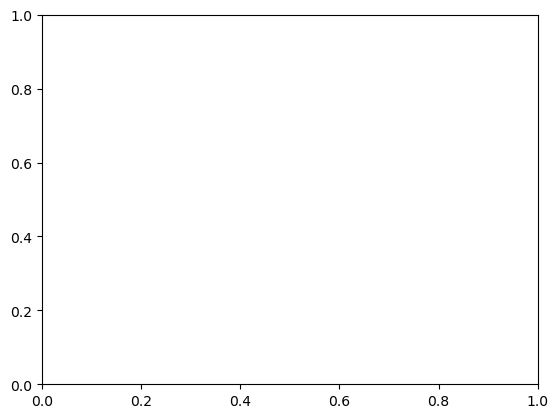

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Küme sayısı denemeleri için sonuçları tutacak liste
inertia = []
kume_sayilari = range(1, 11)

for kume in kume_sayilari:
    kmeans = KMeans(n_clusters=kume, random_state=42, n_init=10)
    kmeans.fit(X_scaled)   # X_scaled yerine olcekli_veri
    inertia.append(kmeans.inertia_)

# Grafiği çizdirme
plt.plot(kume_sayilari, inertia, 'bo-')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Atalet (Inertia)")
plt.title("Dirsek (Elbow) Yöntemi")
plt.show()


# Kümeleme İşlemi: K-Means algoritmasını kullanarak verileri kümeleyin.  


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X_scaled)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Sonuçları Görselleştirme: Kümeleme sonuçlarını uygun grafiklerle görselleştirin ve yorumlayın.  


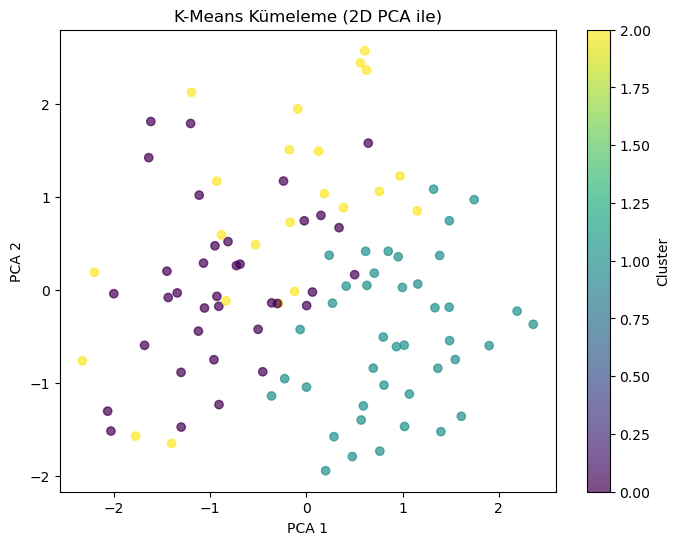

   Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0                   132                    8             35206   
1                   300                   12             46106   
2                   136                    2             16411   
3                   101                    1              7911   
4                   218                   16              6734   

   Number of Evidence Items  Severity  Cluster  
0                        49         2        1  
1                        46         2        1  
2                        31         1        0  
3                        35         1        0  
4                        33         1        0  


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
from sklearn.decomposition import PCA

# Boyut indirgeme (2D görselleştirme için)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Kümeleme (2D PCA ile)")
plt.colorbar(label="Cluster")
plt.show()
# 3. Belirlenen k değeri ile KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # örnek: 3 küme
data["Cluster"] = kmeans.fit_predict(X_scaled)

# 4. Sonuçları inceleme
print(data[["Case Duration (Days)", "Number of Witnesses", 
          "Legal Fees (USD)", "Number of Evidence Items", 
          "Severity", "Cluster"]].head())